## Data Wrangling

In [ ]:
import pandas as pd

In [32]:
# read from excel and clean up index
df = pd.read_excel('canada_clean.xlsx')
df.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
df.set_index('Country', inplace=True)
df.index.name = None

In [33]:
years = list(map(str, range(1980, 2014)))

# top 5 origin countries for immigration to canada
df_top5 = df.sort_values(['Total'], ascending=False).head()

# simplyfy UK index
df_top5.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

# reduce to years and transpose
df_top5 = df_top5[years].transpose()

# change years index to integer for plotting
df_top5.index = df_top5.index.map(int)

In [34]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# set ggplot style
mpl.style.use('ggplot')



# Stacked Area Plot

Text(0, 0.5, 'Number of Immigrants')

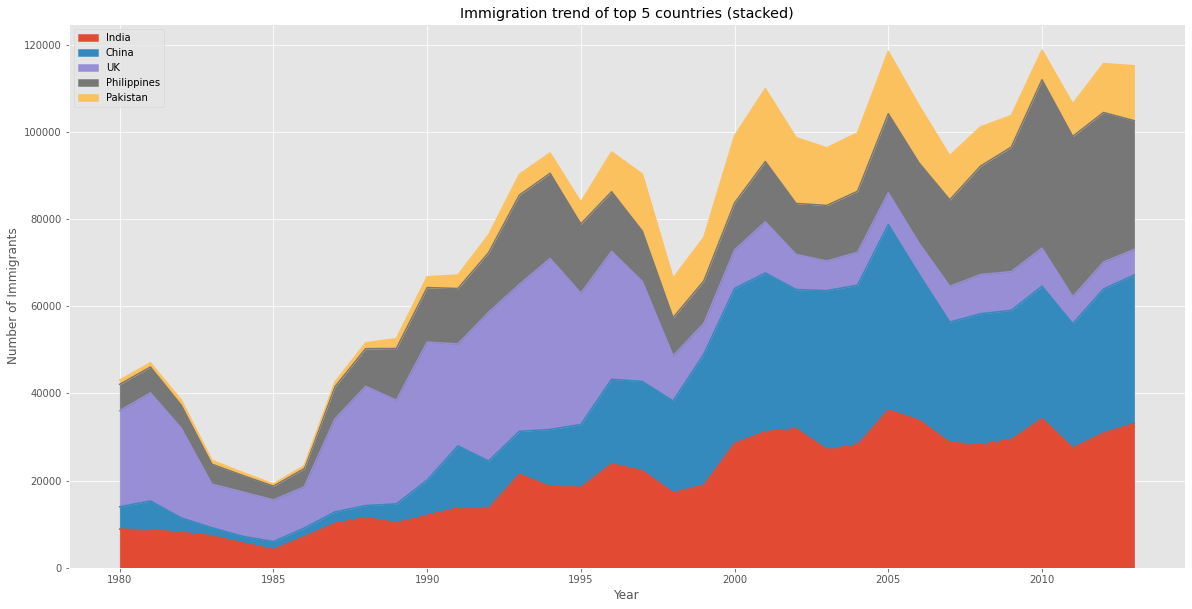

In [35]:
# plot a stacked trend of top 5 source countries
df_top5.plot(kind='area',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size


plt.title('Immigration trend of top 5 countries (stacked)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Unstacked Area Plot

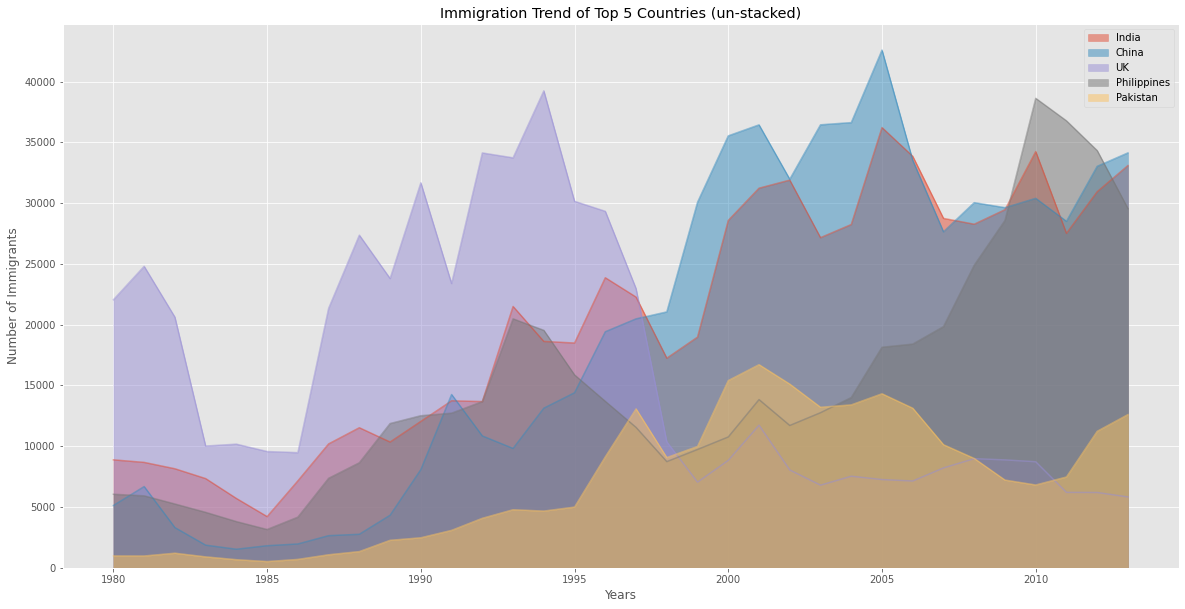

In [36]:
# plot an un-stacked trend of top 5 source countries
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries (un-stacked)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()